In [1]:
import CloudClassificationDatasetCNN2
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as v2
import torch.nn as nn
import torch.optim as optim
import numpy as np
batch_size = 8

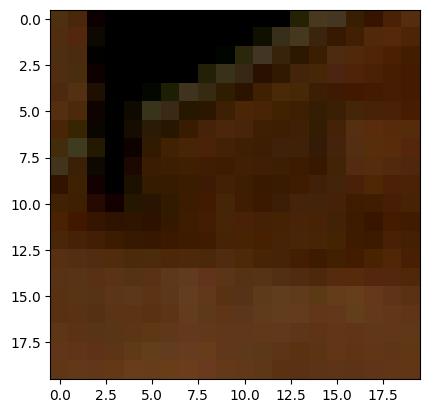

tensor([1, 0])


In [2]:
transforms = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
])

train_dataset = CloudClassificationDatasetCNN2.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_train.npy",channels=("b04","b03","b02","b05","b07","b09","b11","b12"),transform=transforms)
val_dataset = CloudClassificationDatasetCNN2.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_val.npy",channels=("b04","b03","b02","b05","b07","b09","b11","b12"),transform=transforms)

validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creates an iterator and plots the pictures
it = iter(training_loader)
images, labels, img_disp = next(it)

plt.figure()
plt.imshow(img_disp[0][:3].permute(1,2,0))
plt.show()

print(labels[0])

In [3]:
class LeNet(nn.Module):
	def __init__(self, numChannels, classes):
		# call the parent constructor
		super(LeNet, self).__init__()

		self.drop = nn.Dropout(0.9)

		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize first (and only) set of FC => RELU layers
		self.fc1 = nn.Linear(in_features=200, out_features=50)
		self.relu3 = nn.ReLU()
		# initialize our softmax classifier
		self.fc2 = nn.Linear(in_features=50, out_features=classes)
		self.logSoftmax = nn.LogSoftmax(dim=1)

	def forward(self, x):
		# pass the input through our first set of CONV => RELU =>
		# POOL layers
		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		# pass the output from the previous layer through the second
		# set of CONV => RELU => POOL layers
		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		# pass the output to our softmax classifier to get our output
		# predictions
		output = self.fc2(x)
		# return the output predictions
		return output

Epoch: 0 batch_nr: 0 Time: 0.31315010000253096 Time_diff: 0.3131512000109069 loss: 1.2746024131774902
Epoch: 0 batch_nr: 13 Time: 2.517644500010647 Time_diff: 0.16079090000130236 loss: 1.0961742869445257
Epoch: 0 batch_nr: 26 Time: 4.744321000005584 Time_diff: 0.15918750001583248 loss: 1.0079081919458177

 New best loss: 0.9141628609763252


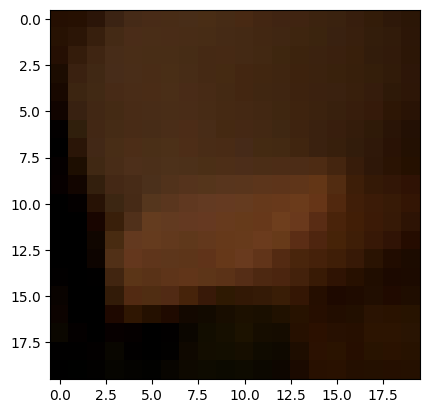

tensor([1, 0])
tensor([0.6068, 0.3932])
Epoch: 1 batch_nr: 12 Time: 9.623603900021408 Time_diff: 0.161109899985604 loss: 0.7390684714684119
Epoch: 1 batch_nr: 25 Time: 11.729183400020702 Time_diff: 0.16320769998128526 loss: 0.8376122678701694

 New best loss: 0.751747253868315


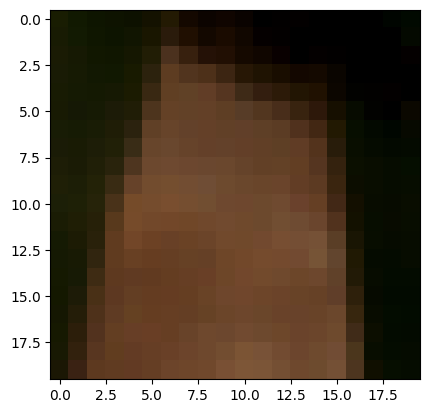

tensor([1, 0])
tensor([0.8493, 0.1507])
Epoch: 2 batch_nr: 11 Time: 16.41148450001492 Time_diff: 0.17597910002223216 loss: 0.7663906688491503
Epoch: 2 batch_nr: 24 Time: 18.7534897000005 Time_diff: 0.16975929998443462 loss: 0.7534169495105744

 New best loss: 0.7347774157921473


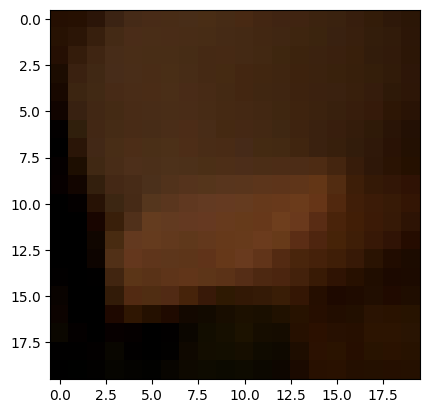

tensor([0, 1])
tensor([0.9278, 0.0722])
Epoch: 3 batch_nr: 10 Time: 23.595872200006852 Time_diff: 0.17508690000977367 loss: 0.7558181069113992
Epoch: 3 batch_nr: 23 Time: 25.71150570001919 Time_diff: 0.1594121000089217 loss: 0.7274585006137689

 New best loss: 0.7051190237204233


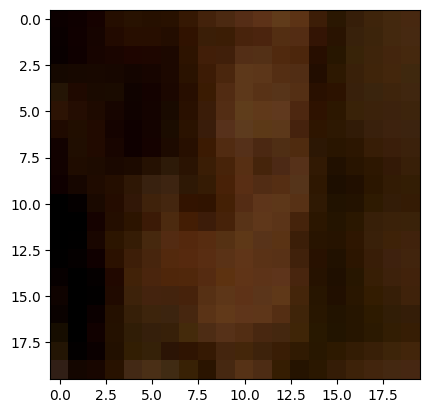

tensor([1, 0])
tensor([0.5101, 0.4899])
Epoch: 4 batch_nr: 9 Time: 30.41289659999893 Time_diff: 0.154084799985867 loss: 0.765025582909584
Epoch: 4 batch_nr: 22 Time: 32.52632530001574 Time_diff: 0.16726180000114255 loss: 0.7391173748866372

 New best loss: 0.6763705313205719


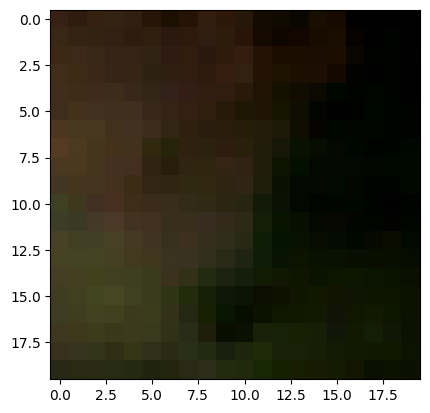

tensor([1, 0])
tensor([0.2205, 0.7795])
Epoch: 5 batch_nr: 8 Time: 37.304172600008314 Time_diff: 0.16891410000971518 loss: 0.6555772937006421
Epoch: 5 batch_nr: 21 Time: 39.43762880002032 Time_diff: 0.1587310999748297 loss: 0.7155867103825916
new val loss: 0.6889529161983066
Epoch: 6 batch_nr: 7 Time: 43.97219739999855 Time_diff: 0.1680181999981869 loss: 0.5156250931322575
Epoch: 6 batch_nr: 20 Time: 46.09534250001889 Time_diff: 0.16571709999698214 loss: 0.5902818945192155

 New best loss: 0.6707993712690141


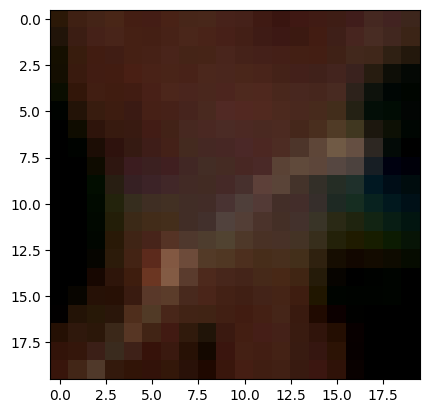

tensor([1, 0])
tensor([0.5551, 0.4449])
Epoch: 7 batch_nr: 6 Time: 50.71849980001571 Time_diff: 0.20559299999149516 loss: 0.863755349602018
Epoch: 7 batch_nr: 19 Time: 52.860090500005754 Time_diff: 0.1637285999895539 loss: 0.687199755012989
Epoch: 7 batch_nr: 32 Time: 54.88783069999772 Time_diff: 0.08186079998267815 loss: 0.6423556009928385

 New best loss: 0.6410174998972151


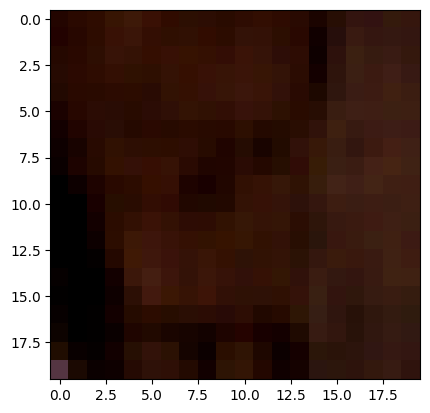

tensor([1, 0])
tensor([0.5778, 0.4222])
Epoch: 8 batch_nr: 5 Time: 57.87753719999455 Time_diff: 0.23862339998595417 loss: 0.7642352680365244
Epoch: 8 batch_nr: 18 Time: 60.486039300012635 Time_diff: 0.205028600001242 loss: 0.6468265621285689
Epoch: 8 batch_nr: 31 Time: 63.191376100003254 Time_diff: 0.1985968000080902 loss: 0.6295392857864499
new val loss: 0.6567453477117751
Epoch: 9 batch_nr: 4 Time: 66.00352709999424 Time_diff: 0.18839029999799095 loss: 0.6623652756214142
Epoch: 9 batch_nr: 17 Time: 68.52775569999358 Time_diff: 0.19493599998531863 loss: 0.5624352229966058
Epoch: 9 batch_nr: 30 Time: 71.02497810000204 Time_diff: 0.18741370001225732 loss: 0.6006420937276655
new val loss: 0.6568702790472243
Epoch: 10 batch_nr: 3 Time: 73.79112420001184 Time_diff: 0.19314730001497082 loss: 0.6800396889448166
Epoch: 10 batch_nr: 16 Time: 76.28419370000483 Time_diff: 0.19069310001214035 loss: 0.6255471794044271
Epoch: 10 batch_nr: 29 Time: 78.79162190001807 Time_diff: 0.19649859998025931 lo

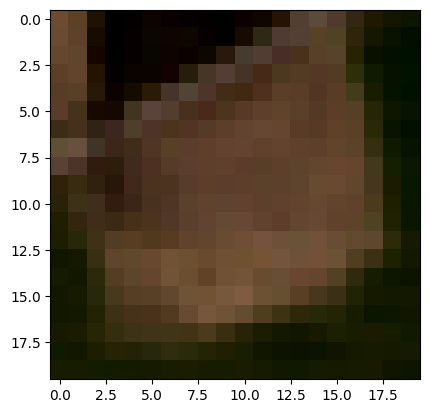

tensor([1, 0])
tensor([0.6513, 0.3487])
Epoch: 13 batch_nr: 0 Time: 98.35727239999687 Time_diff: 2.151265099993907 loss: 0.42841845750808716
Epoch: 13 batch_nr: 13 Time: 100.99118549999548 Time_diff: 0.19611900000018068 loss: 0.6709750060524259
Epoch: 13 batch_nr: 26 Time: 103.5476755000127 Time_diff: 0.1944118000101298 loss: 0.6377820383619379
new val loss: 0.648094054725435
Epoch: 14 batch_nr: 12 Time: 108.89686890001758 Time_diff: 0.1912986999959685 loss: 0.6288385964356936
Epoch: 14 batch_nr: 25 Time: 111.59249510001973 Time_diff: 0.19975329999579117 loss: 0.6239808304951742
new val loss: 0.6452507078647614
Epoch: 15 batch_nr: 11 Time: 116.87060860000202 Time_diff: 0.1848998999921605 loss: 0.5468353529771169
Epoch: 15 batch_nr: 24 Time: 119.37649160000728 Time_diff: 0.1866470999957528 loss: 0.561260085105896
new val loss: 0.6611084342002869
Epoch: 16 batch_nr: 10 Time: 124.67321579999407 Time_diff: 0.19821269999374636 loss: 0.477740463885394
Epoch: 16 batch_nr: 23 Time: 127.2101036

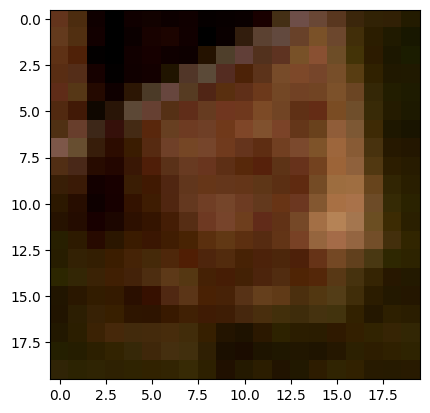

tensor([1, 0])
tensor([0.8405, 0.1595])
Epoch: 26 batch_nr: 0 Time: 203.59065739999642 Time_diff: 2.0446955999941565 loss: 0.9097743630409241
Epoch: 26 batch_nr: 13 Time: 206.2115939000214 Time_diff: 0.19557089998852462 loss: 0.6120310361896243
Epoch: 26 batch_nr: 26 Time: 208.72552969999379 Time_diff: 0.19129329998395406 loss: 0.6012099197617283
new val loss: 0.6500335534413656
Epoch: 27 batch_nr: 12 Time: 214.07639040000504 Time_diff: 0.19393840001430362 loss: 0.5807643234729767
Epoch: 27 batch_nr: 25 Time: 216.59081019999576 Time_diff: 0.18661159998737276 loss: 0.6111579457154641
new val loss: 0.6381192604700724
Epoch: 28 batch_nr: 11 Time: 221.98499420000007 Time_diff: 0.19240860000718385 loss: 0.7728504737218221
Epoch: 28 batch_nr: 24 Time: 224.48176749999402 Time_diff: 0.194162999978289 loss: 0.6621165025234222
new val loss: 0.65934909052319
Epoch: 29 batch_nr: 10 Time: 229.7163997000025 Time_diff: 0.1860926999943331 loss: 0.740721729668704
Epoch: 29 batch_nr: 23 Time: 232.338768

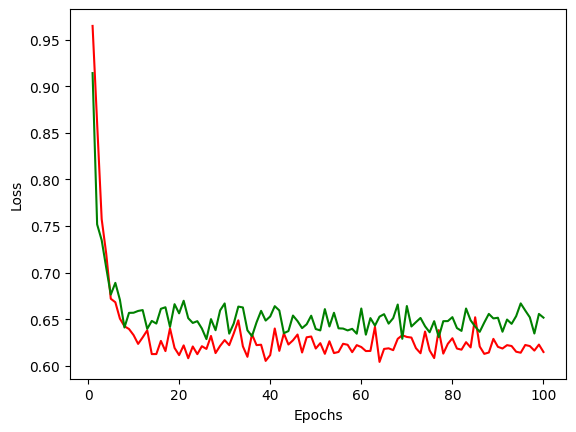

In [5]:
import copy
from time import perf_counter

epochs=100

def train_model(train_loader, val_loader, model, criterion, optimizer, scheduler):
    start_time = perf_counter()
    time = 0

    best_loss = float('inf')

    train_loss = []
    val_loss = []
    for epoch in range(epochs):
        avg_loss_list = []
        for batch_nr, (images,labels,_) in enumerate(train_loader):
            
            #Forward pass
            predictions = model(images)
            loss = criterion(predictions,labels.float())
            avg_loss_list.append(loss.item())
            
            if((batch_nr+epoch)%13==0):
                print("Epoch:",epoch,"batch_nr:",batch_nr,"Time:",perf_counter()-start_time,"Time_diff:",perf_counter()-start_time-time,"loss:",(sum(avg_loss_list)/len(avg_loss_list)))
            time=perf_counter()-start_time

            #Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Update learning rate
            scheduler.step()

        avg_val_loss_list = []
        #Grabs next iterator batch, restarts if at end of iterator
        for batch_nr, (images_valid,labels_valid,img_disp_valid) in enumerate(val_loader):
        #Forward - Validation
            predictions = model(images_valid)
            v_loss = criterion(predictions,labels_valid.float())
            avg_val_loss_list.append(v_loss.item())

        
        train_loss.append((sum(avg_loss_list)/len(avg_loss_list)))
        val_loss.append((sum(avg_val_loss_list)/len(avg_val_loss_list)))

        #Finds best model
        if (val_loss[-1]<best_loss):
            best_loss=val_loss[-1]
            best_model = copy.deepcopy(model)
            torch.save(model, 'CNN1b.pt')
            print("\n New best loss:",best_loss)
            plt.figure()
            plt.imshow(img_disp_valid[0][:3].permute(1,2,0))
            plt.show()
            
            print(labels[0])
            print(nn.Softmax(dim=1)(predictions.detach())[0])
        else:
            print("new val loss:",val_loss[-1])

    
    plt.plot(range(1,epochs+1),train_loss, color='r', label='losses')
    plt.plot(range(1,epochs+1),val_loss, color='g', label='losses_valid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    return best_model

    

model = LeNet(8,2)
optimizer = optim.Adam(model.parameters(),lr=3e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.9)
criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1.0,2.611111111111111])) #weight=torch.Tensor([1.0,2.611111111111111])

best_model=train_model(training_loader,validation_loader,model,criterion,optimizer,scheduler)


In [7]:
test_dataset = CloudClassificationDatasetCNN2.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_test.npy",channels=("b04","b03","b02","b05","b07","b09","b11","b12"),transform=transforms)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
model = torch.load("CNN1b.pt").eval()
# Creates an iterator and plots the pictures
it = iter(test_loader)



In [50]:
cloud=0
ncloud=0
for batch_nr, (_,labels) in enumerate(training_loader):
    for label in labels:
        if torch.argmax(label).item()==0:
            ncloud+=1
        else:
            cloud+=1

print("cloud:",cloud)
print("ncloud:",ncloud)
print(max(cloud,ncloud)/cloud)
print(max(cloud,ncloud)/ncloud)

cloud: 72
ncloud: 188
2.611111111111111
1.0


In [74]:
def from_one_hot(label):
    return np.argmax(label,0)

In [8]:
CM = [[0,0],
      [0,0]]

correct=0
total=0

for batch_nr, (images,labels,_) in enumerate(test_loader):
    preds = model(images)
    preds2 = nn.Softmax(dim=1)(preds.detach())
    preds2bin = (torch.zeros(preds2.shape).scatter (1, preds2.argmax(1).unsqueeze(1), 1.0).to(torch.int64))
    for pred, label in zip(preds2bin,labels):
        total+=1
        for a_class in range(2):
            for p_class in range(2):
                if(pred[p_class].item()==1 and label[a_class].item()==1):
                    CM[a_class][p_class] += 1

print("Confusion Matrix:")
print(CM[0][0],"\t",CM[0][1])
print(CM[1][0],"\t",CM[1][1])

print()
prec = CM[0][0]/(CM[0][0]+CM[1][0])
reca = CM[0][0]/(CM[0][0]+CM[0][1])
f1 = (2*prec*reca)/(prec+reca)
acc = (CM[0][0]+CM[1][1])/total
print("precision:",prec)
print("recall:",reca)
print("f1:",f1)
print("accuracy:",f1)


Confusion Matrix:
64 	 8
5 	 23

precision: 0.927536231884058
recall: 0.8888888888888888
f1: 0.9078014184397163
accuracy: 0.9078014184397163
